In [6]:
import glob
import random
import torch
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
import matplotlib.pyplot as plt


In [7]:
root_dir = "temporal_ds/images/train"
img_size = 224

In [8]:
sets = glob.glob(f"{root_dir}/**/*")
random.shuffle(sets)

In [9]:
idx = 0

In [10]:
img_folder = sets[idx]
img_list = glob.glob(f"{img_folder}/*.jpg")
img_list.sort()

In [11]:
# Collect labels for bounding boxes (assuming one label per image)
labels = []
for file in img_list:
    label_file = file.replace("images", "labels").replace(".jpg", ".txt")
    with open(label_file, "r") as f:
        lines = f.readlines()
        print(lines)

    # Assuming the first line in each label file contains the necessary bounding box info
    labels.append(np.array(lines[0].split(" ")[1:5]).astype("float"))

labels = np.array(labels)

['0 0.113281 0.738889 0.029688 0.038889\n']
['0 0.112109 0.7375 0.032031 0.038889\n']
['0 0.107812 0.735417 0.029688 0.034722\n']
['0 0.119141 0.75 0.008594 0.016667\n']


In [12]:
def xywh2xyxy(x: np.array):
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y


In [13]:
labels

array([[0.113281, 0.738889, 0.029688, 0.038889],
       [0.112109, 0.7375  , 0.032031, 0.038889],
       [0.107812, 0.735417, 0.029688, 0.034722],
       [0.119141, 0.75    , 0.008594, 0.016667]])

In [14]:
labels = xywh2xyxy(labels)

In [15]:
labels

array([[0.098437 , 0.7194445, 0.128125 , 0.7583335],
       [0.0960935, 0.7180555, 0.1281245, 0.7569445],
       [0.092968 , 0.718056 , 0.122656 , 0.752778 ],
       [0.114844 , 0.7416665, 0.123438 , 0.7583335]])

In [16]:
x0, y0 = np.min(labels[:, :2],0)
x1, y1 = np.max(labels[:, 2:],0)

In [17]:
x0, y0, x1, y1

(0.09296800000000001, 0.7180555000000001, 0.12812500000000002, 0.7583335)

In [18]:
images = [Image.open(file) for file in img_list]
w, h = images[0].size
x0, y0, x1, y1 = int(x0*w), int(y0*h), int(x1*w), int(y1*h)
x0, y0, x1, y1 

(118, 516, 164, 546)

In [19]:
xc = x0 + (x1 - x0) / 2
yc = y0 + (y1 - y0) / 2

In [20]:
crop_size = max(x1-x0, y1-y0) * 1.2
crop_size

55.199999999999996

In [21]:
if crop_size < img_size:
    crop_x0 = max(int(xc - img_size / 2), 0)
    crop_x1 = min(int(xc + img_size / 2), w)
    crop_y0 = max(int(yc - img_size / 2), 0)
    crop_y1 = min(int(yc + img_size / 2), h)

else:
    crop_x0 = max(int(xc - crop_size / 2), 0)
    crop_x1 = min(int(xc + crop_size / 2), w)
    crop_y0 = max(int(yc - crop_size / 2), 0)
    crop_y1 = max(int(yc + crop_size / 2), h)

crop_x0, crop_y0, crop_x1, crop_y1

(29, 419, 253, 643)

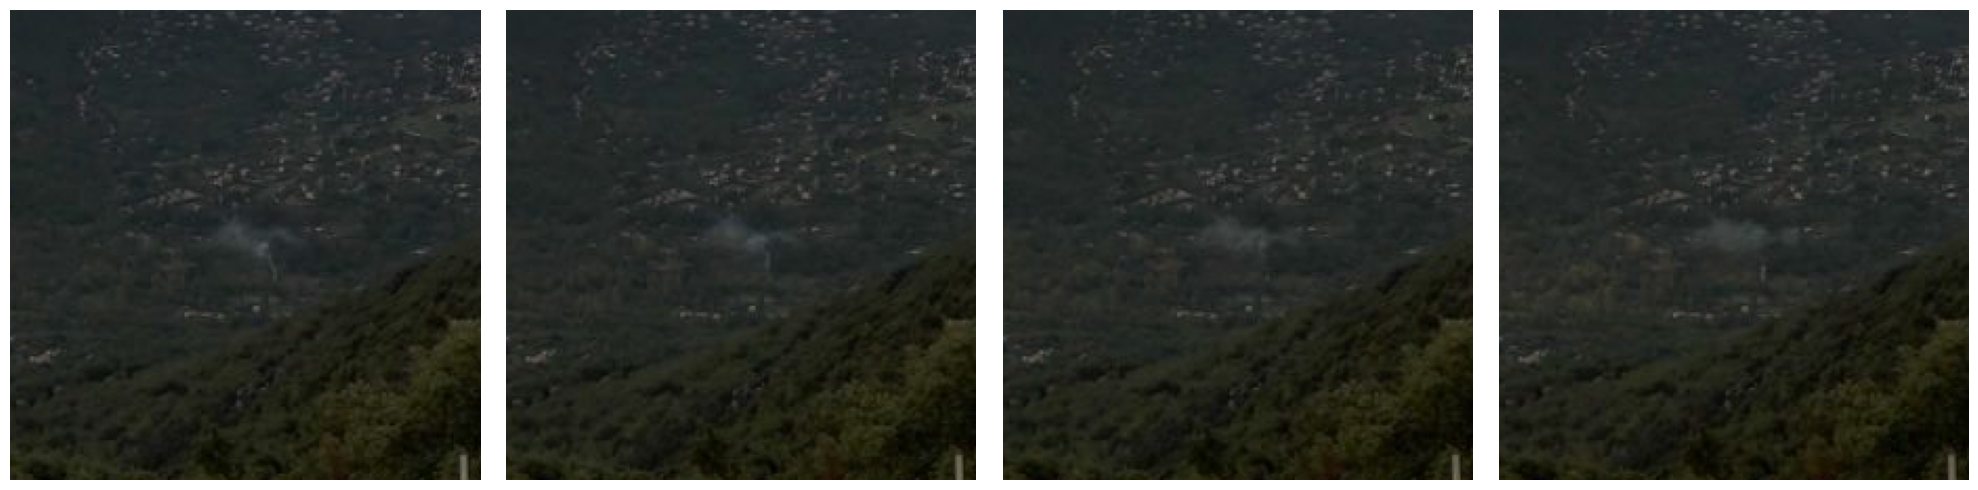

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

for i, im in enumerate(images): 
    cropped_image = im.crop((crop_x0, crop_y0, crop_x1, crop_y1))
    if crop_size > img_size:
        cropped_image = cropped_image.resize((img_size, img_size))

    # Display each image in the subplot
    axes[i].imshow(cropped_image)
    axes[i].axis('off')  # Turn off the axis for a cleaner look

# Display all images
plt.tight_layout()
plt.show()  


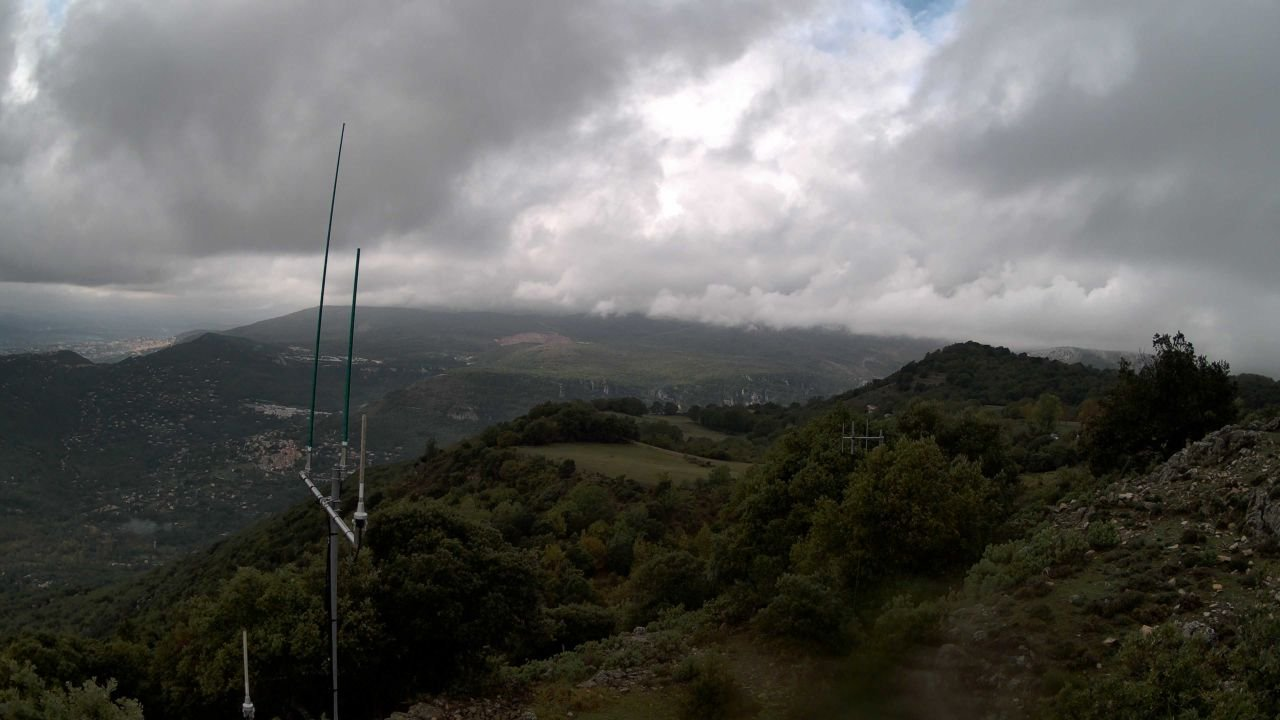

In [23]:
im

In [24]:
from src.fire_series_dataset import FireSeriesDataset
import time

In [25]:
root_dir = "temporal_ds/images/train"
img_size = 224
ds = FireSeriesDataset(root_dir, img_size)

In [26]:
st = time.time()
ds[0][0].shape
time.time() - st

0.017366409301757812

In [27]:
ds[0][0][1].shape

torch.Size([3, 224, 224])

In [28]:
ds[0][0][1].size

<function Tensor.size>